In [ ]:
from pathlib import Path
import pandas as pd

# Prepare dataset

In [ ]:
#Unzip dataset from https://www.kaggle.com/datasets/kazanova/sentiment140
! unzip archive.zip

Archive:  archive.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
#Create new dataset from the 2 columns Text and target
from sklearn.utils import shuffle



dataset_columns = ['target', 'id', 'date', 'flag', 'user', 'text']
dataset_encoding = "ISO-8859-1"
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=dataset_encoding, names=dataset_columns)

data = df[['text', 'target']]

#Replace 4 with 1 which is Positive sentence
#Take 5K from Neg/Pos to create test dataset
data['target'] = data['target'].replace(4, 1)

data_neg = data[data['target'] == 0]
data_neg = data_neg.sample(455000)
test_data_neg = data_neg[:5000]
data_neg = data_neg[5000:]


data_pos = data[data['target'] == 1]
data_pos = data_pos.sample(455000)
test_data_pos = data_pos[:5000]
data_pos = data_pos[5000:]

#Create train dataset with the 900K samples
#Rename columns target to label
train_dataset = pd.concat([data_pos, data_neg])
train_dataset = shuffle(train_dataset)
train_dataset.rename(columns={'target': 'label'}, inplace=True)
train_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,text,label
989408,My boyfriend is playing a US Open qualifier to...,1
98454,@MWPayne @orangemonkeyj I've got La Clique tic...,0
1509133,i love shawna and douglas!,1
317610,Just doing some quick work for Media got to le...,0
877333,@Blumelisa thanks very much,1


- The first 5000 samples from both negative and positive are used as a test dataset, rest is train dataset

In [ ]:
train_dataset.shape

(900000, 2)

In [ ]:
#Create test dataset
#Rename columns target to label
test_dataset = pd.concat([test_data_pos, test_data_neg])
test_dataset = shuffle(test_dataset)
test_dataset.rename(columns={'target': 'label'}, inplace=True)
test_dataset.head()

,text,label
325586,@_taylortrash_ no I work Tuesday-Saturday,0
742856,jees! all i have done today is stuff my face!,0
559810,"Swapped routers this morning. All seems good, ...",0
1382796,"@justamoochin awww, thanks for the mooches",1
343840,My FriendFeed Search doesn't remember my searc...,0


In [ ]:
test_dataset.shape

(10000, 2)

In [ ]:
#Save both datasets as .csv
train_dataset.to_csv('train_data_tweetsENG.csv',index=False)
test_dataset.to_csv('test_data_tweetsENG.csv',index=False)

# Let's look at data

In [ ]:
train_dataset = pd.read_csv('train_data_tweetsENG.csv')

In [ ]:
df_number_of_categories = train_dataset.groupby(['label']).label.count().reset_index(name='Count')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

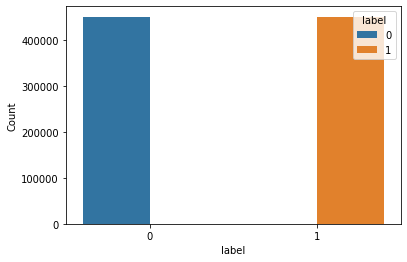

In [ ]:
sns.barplot(data=df_number_of_categories, y='Count', x='label', hue='label')

- The train dataset is perfectly balanced
- It contains two labels wherest **0 - negative**, **1 - positive**

In [ ]:
df_number_of_categories

,label,Count
0,0,450000
1,1,450000


- Test dataset is balanced with 5000 samples from negative and 5000 samples from positive

# Tokenize sentences and remove puncuation
- I won't be using this method later, but it's good for visual text analysis

In [ ]:
import itertools
import nltk
from textblob import TextBlob

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return tweet_blob.words

# Most common words in train dataset

In [ ]:
train_dataset['Words'] = train_dataset['text'].apply(form_sentence)

In [ ]:
words = list(itertools.chain(*train_dataset.Words))

In [ ]:
word_freq = nltk.FreqDist(words)

In [ ]:
word_freq

In [ ]:
#How many unique words train dataset contains
len(word_freq)

589346

In [ ]:
#Longest tweet
max(train_dataset.Words.apply(len))

118

In [ ]:
#Average tweet length
train_dataset.Words.str.len().mean()

13.638872222222222

- The train dataset contains **589346** unique words
- The longest tweet is **118** words long
- The average tweet is **14** words long

# Histogram of words in tweet

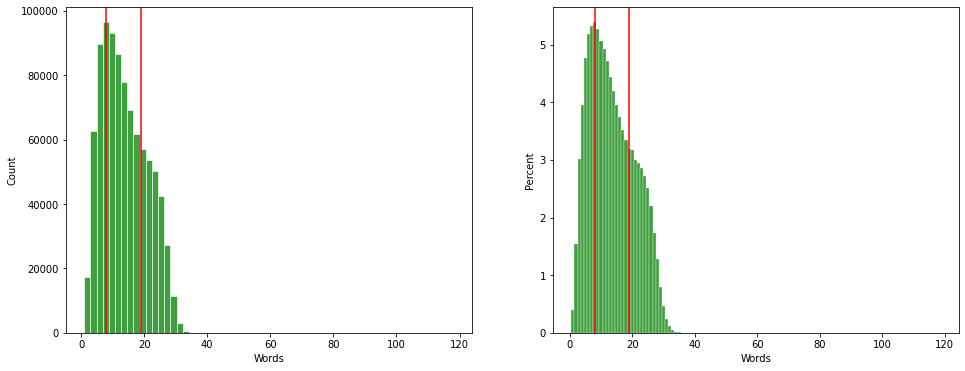

In [ ]:
fig = plt.figure(figsize=(16,6))
fig = plt.subplot(1,2,1)
sns.histplot(train_dataset.Words.apply(len), bins=60, edgecolor='white', color='green')
plt.axvline(train_dataset.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_dataset.Words.apply(len).quantile(0.75), color='red')

fig = plt.subplot(1,2,2)
sns.histplot(train_dataset.Words.apply(len), bins=60, edgecolor='white', color='green', stat="percent", discrete=True)
plt.axvline(train_dataset.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_dataset.Words.apply(len).quantile(0.75), color='red')

- The interquartile range is between 7 and 19 words

# Let's create a Word Cloud for most common words

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

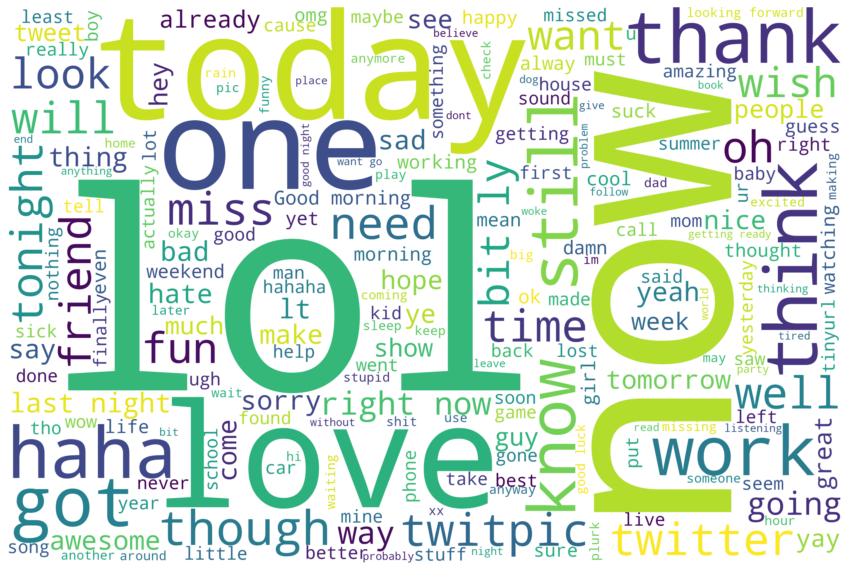

In [ ]:
text = " ".join(review for review in train_dataset.text)

stopwords = set(STOPWORDS)
stopwords.update(["br", "amp", "quot"])	

wordcloud = WordCloud(stopwords=stopwords, width= 3000, height = 2000,background_color="white").generate(text)

plt.figure(figsize=(15,11))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Those words make perfect sense as a most common words in tweet